# LVC: Caviar Investigation Phases Case Study

In this problem, you will study a time-varying criminal network that is repeatedly disturbed by police forces. 
The data for this problem can be found in CAVIAR.zip. 

### **Context**

Here is some information on the CAVIAR project and the role of certain individuals arrested following the investigation. This investigation lasted two years and ran from 1994 to 1996. The operation brought together investigation units of the Montr´eal police and the Royal Canadian Mounted Police of Canada. During this two year period, 11 wiretap warrants, valid for a period of about two months each, were obtained (11 matrices match these phases). This case is rather unique, because unlike other investigative strategies, the mandate of the CAVIAR project was to seize the drugs without arresting villains. During this period, imports of the trafficking network were hit by the police on eleven occasions. The arrests took place only at the end of the investigation. Monetary losses for traffickers were estimated at 32 million dollars. Eleven seizures took place throughout the investigation. Some phases included no seizures, and others included multiple. Here is what they represent in terms of the amount of money: 
- Phase 4 1 seizure 2,500,000 Dollars, 300 kg of marijuana 
- Phase 6 3 seizures 1,300,000 Dollars, 2 x 15 kg of marijuana + 1 x 2 kg of cocaine 
- Phase 7 1 seizure 3,500,000 Dollars, 401 kg of marijuana 
- Phase 8 1 seizure 360,000 Dollars, 9 kg of cocaine 
- Phase 9 2 seizures 4,300,000 Dollars, 2 kg of cocaine + 1 x 500 kg marijuana 
- Phase 10 1 seizure 18,700,000 Dollars, 2200 kg of marijuana 
- Phase 11 2 seizures 1,300,000 Dollars, 12 kg of cocaine + 11 kg of cocaine 

As you can see, this case offers a rare opportunity to study a criminal network in upheaval by police forces. This allows us to analyze changes in the network structure and to survey the reaction and adaptation of the participants while they were subjected to an increasing number of distressing constraints. 

#### About the network

The network consists of 110 (numbered) players. Players 1-82 are the traffickers. Players 83-110 are the non-traffickers (financial investors; accountants; owners of various importation businesses, etc.). Initially, the investigation targeted Daniel Serero, the alleged mastermind of a drug network in downtown Montr´eal, attempting to import marijuana to Canada from Morocco, transiting through Spain. After the first seizure, happening in phase 4, traffickers reoriented to cocaine import from Colombia, transiting through the United States. 
According to the police, the role of the actors of the “Serero organization” under investigation are the following: 
- Serero, Daniel (n1) : Mastermind of the network. 
- Pierre Perlini (n3) : Principal lieutenant of Serero, he executes his instructions. 
- Alain (n83) and G´erard (n86) Levy : Investors and transporters of money. 
- Wallace Lee (n85) : Takes care of financial affairs (accountant). 
- Gaspard Lino (n6): Broker in Spain. 
- Samir Rabbat (n11): Provider in Morocco. 
- Lee Gilbert (n88): Trusted man of Wallace Lee (became an informer after the arrest). 
- Beverly Ashton (n106): Spouse of Lino, transports money and documents.  
- Antonio Iannacci (n89): Investor. 
- Mohammed Echouafni (n84): Moroccan investor. 
- Richard Gleeson (n5), Bruno de Quinzio (n8) and Gabrielle Casale (n76) : Charged with recuperating the marijuana. 
- Roderik Janouska (n77): Individual with airport contacts. 
- Patrick Lee (n87): Investor. 
- Salvatore Panetta (n82): Transport arrangements manager. 
- Steve Cunha (n96): Transport manager, owner of a legitimate import company (became an informer after the arrest). 
- Ernesto Morales (n12): Principal organizer of the cocaine import, intermediary between the Colombians and the Serero organization. 
- Oscar Nieri (n17): The handyman of Morales. 
- Richard Brebner (n80): Was transporting the cocaine from the US to Montr´eal. 
- Ricardo Negrinotti (n33): Was taking possession of the cocaine in the US to hand it to Brebner. 
- Johnny Pacheco (n16): Cocaine provider. 

### **Objective**

- The objective of the case study is to understand, create and visualize the data in phases. 
- Later on, apply the different centrality measures and understand the important nodes.
- Visualize the centrality measure of the important nodes across phases

## 1. Importing required libraries

In [21]:
# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Fit notebook cell width to window
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [22]:
%matplotlib inline

import networkx as nx
from decorator import decorator
from networkx.utils import create_random_state, create_py_random_state
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format        

In [23]:
sns.set(font_scale=1.025, rc={'figure.figsize': (10, 6),
                              'axes.facecolor': '#f2f2f0',
                              'axes.edgecolor': '#f2f2f0',
                              'figure.facecolor': '#f2f2f0', 
                              'grid.color': '#c4c4c4', 
                              'grid.linewidth': 0.5,
                              'lines.linewidth': 1.5,
                              'text.color': '#000000',
                              'xtick.color': '#000000',
                              'ytick.color': '#000000'})

#### 2. Load the data

In [24]:
from os import listdir
from os.path import isfile, join

def list_dir(path: str) -> None:
    filenames = [f for f in listdir(path) if isfile(join(path, f))]
    return filenames

In [5]:
dfs = []
mypath = './CAVIAR_Phases - Notebook'
filenames = listdir(mypath)

for file in filenames:
    full_path = mypath+'/'+file
    print(full_path)
    dfs.append(pd.read_csv(full_path, index_col=[0]))
    
P1, P2, P3, P4, P5, P6, P7, P8, P9, P10, P11 = dfs

./CAVIAR_Phases - Notebook/phase1.csv
./CAVIAR_Phases - Notebook/phase10.csv
./CAVIAR_Phases - Notebook/phase11.csv
./CAVIAR_Phases - Notebook/phase2.csv
./CAVIAR_Phases - Notebook/phase3.csv
./CAVIAR_Phases - Notebook/phase4.csv
./CAVIAR_Phases - Notebook/phase5.csv
./CAVIAR_Phases - Notebook/phase6.csv
./CAVIAR_Phases - Notebook/phase7.csv
./CAVIAR_Phases - Notebook/phase8.csv
./CAVIAR_Phases - Notebook/phase9.csv


In [6]:
P1.head()

,Unnamed: 0,1,4,89,83,3,5,88,85,90,2,7,54,6,64,8
0,1,0,1,4,0,4,2,2,9,1,2,0,2,0,1,1
1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,89,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0
3,83,1,0,0,0,0,0,0,0,0,0,0,0,5,0,0
4,3,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0


So, we have the data in form of an adjacency matrix represented through a data frame. Note that

- the first column (Unnamed: 0) needs to be set as the index
- the columns names and the indices should have the same data type

Let us check the points above.

In [7]:
# Setting first column as the index to achieve the adjacency matrix for each phase

#defining a list with the phases

phases = [P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11]

#Now let us set the first column as the index for all the dataframes
for p in phases:
    p.set_index(p.columns[0], inplace=True)

In [8]:
P1

,1,4,89,83,3,5,88,85,90,2,7,54,6,64,8
Unnamed: 0,,,,,,,,,,,,,,,
1,0,1,4,0,4,2,2,9,1,2,0,2,0,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
89,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0
83,1,0,0,0,0,0,0,0,0,0,0,0,5,0,0
3,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
88,1,0,0,0,1,0,0,3,0,0,0,0,1,0,0
85,1,0,0,0,0,0,2,0,0,0,0,0,5,0,0
90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
# while the index is integer type, the column headers are Object type. Lets convert the headers to integer types
for p in phases:
    p.columns = [int(col) for col in p.columns]

# Now that we have set the index, check for the consistency in column name and indices data type
P1.index, P1.columns

(Int64Index([1, 4, 89, 83, 3, 5, 88, 85, 90, 2, 7, 54, 6, 64, 8], dtype='int64', name='Unnamed: 0'),
 Int64Index([1, 4, 89, 83, 3, 5, 88, 85, 90, 2, 7, 54, 6, 64, 8], dtype='int64'))

## 3. Generate graph

Now, that we have created the adjacency matrix, let us now try to create graphs out of these adjacency matrix.

- We will use the from_pandas_adjacency function and pass on the adjacency matrix for each phase as a dataframe

In [10]:
# great, now that it has worked, let us use the dataframe as an adjacency matrix and build our graph

graphs = []
for i,p in enumerate(phases):
    g = nx.from_pandas_adjacency(p, create_using = nx.DiGraph())
    g.name = (f'Phase {i+1}')
    print(nx.info(g))
    print(g.nodes)
    print('-'*100)
    
    graphs.append(g)

Name: Phase 1
Type: DiGraph
Number of nodes: 15
Number of edges: 26
Average in degree:   1.7333
Average out degree:   1.7333
[5, 83, 3, 4, 1, 89, 2, 85, 7, 54, 88, 6, 64, 90, 8]
----------------------------------------------------------------------------------------------------
Name: Phase 2
Type: DiGraph
Number of nodes: 42
Number of edges: 68
Average in degree:   1.6190
Average out degree:   1.6190
[3, 85, 4, 1, 83, 86, 84, 9, 8, 76, 87, 16, 18, 12, 82, 14, 65, 40, 37, 22, 17, 81, 19, 44, 38, 58, 24, 96, 46, 70, 41, 73, 21, 103, 104, 105, 27, 95, 93, 42, 71, 45]
----------------------------------------------------------------------------------------------------
Name: Phase 3
Type: DiGraph
Number of nodes: 41
Number of edges: 72
Average in degree:   1.7561
Average out degree:   1.7561
[24, 83, 1, 88, 3, 85, 86, 76, 82, 14, 11, 84, 79, 17, 13, 61, 18, 12, 78, 87, 16, 81, 59, 94, 37, 96, 26, 36, 58, 101, 41, 46, 27, 93, 42, 43, 102, 72, 92, 66, 65]
--------------------------------------

## 4. Visualizing the graphs

Let us now visualize the graphs that we created above.

In [11]:
#!python -m pip install --user -U decorator 

****************************************************************************************************
Graph for phase: 1


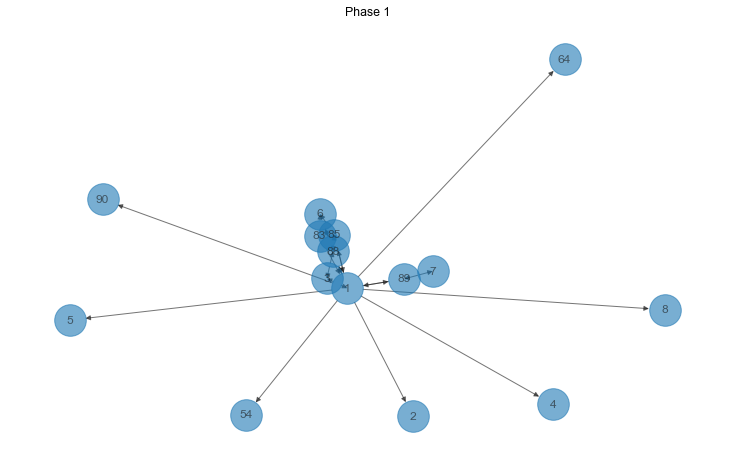

****************************************************************************************************
Graph for phase: 2


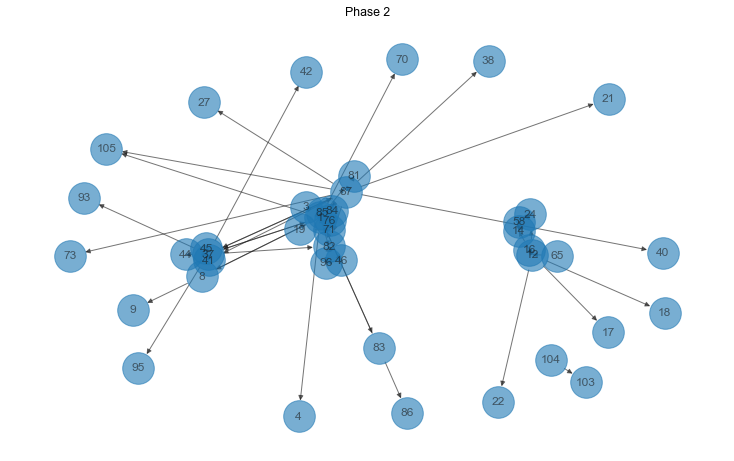

****************************************************************************************************
Graph for phase: 3


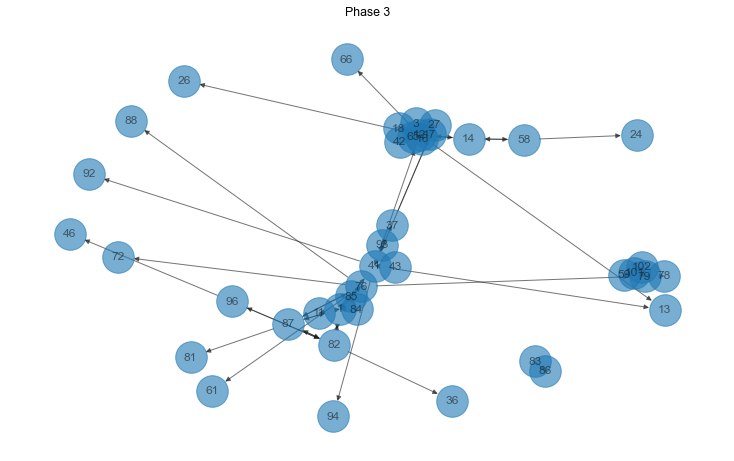

****************************************************************************************************
Graph for phase: 4


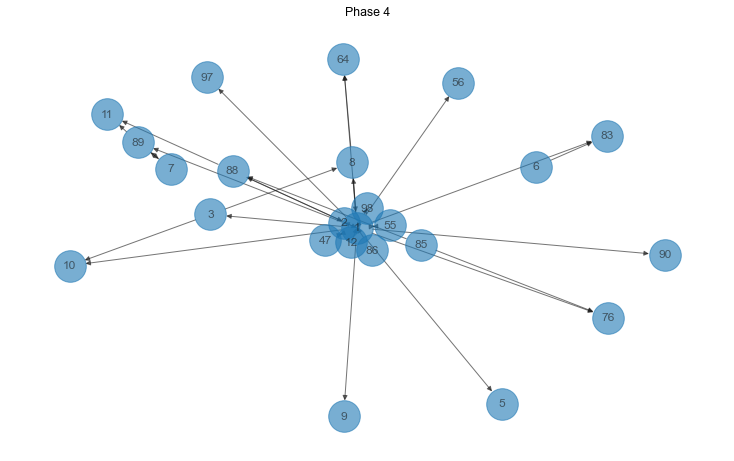

****************************************************************************************************
Graph for phase: 5


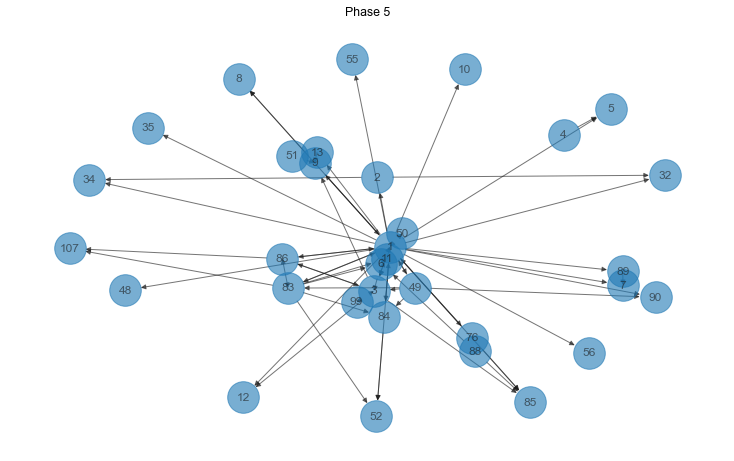

****************************************************************************************************
Graph for phase: 6


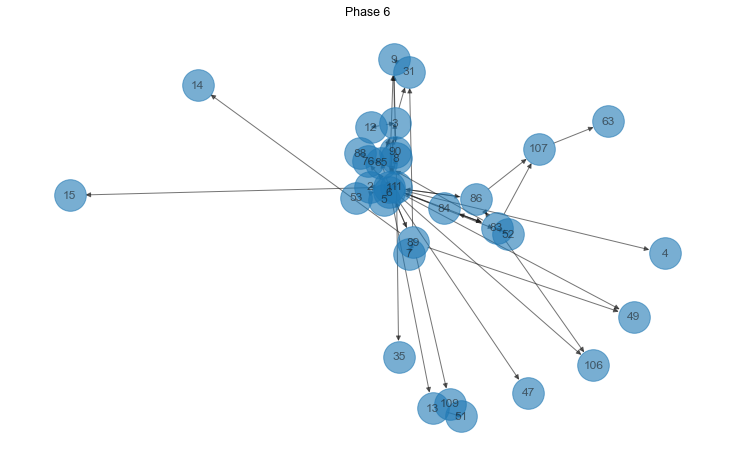

****************************************************************************************************
Graph for phase: 7


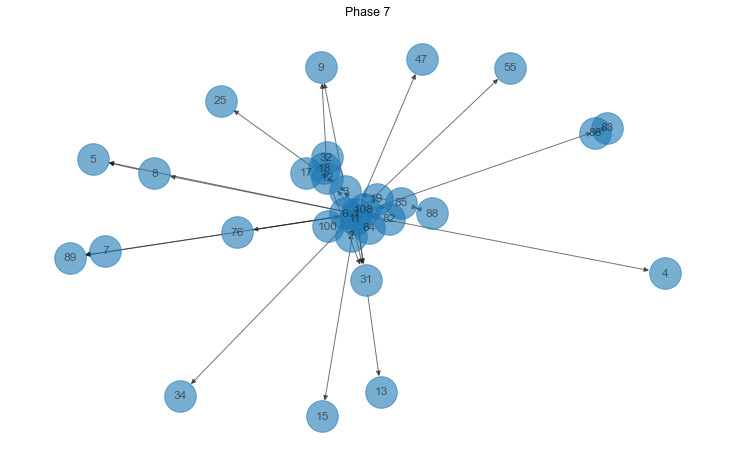

****************************************************************************************************
Graph for phase: 8


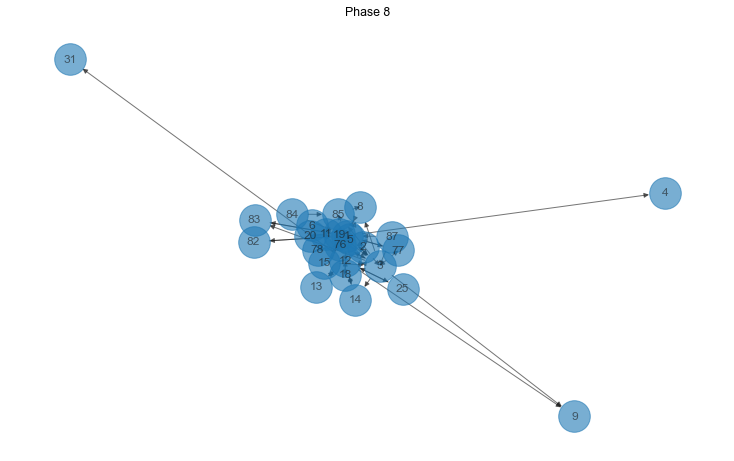

****************************************************************************************************
Graph for phase: 9


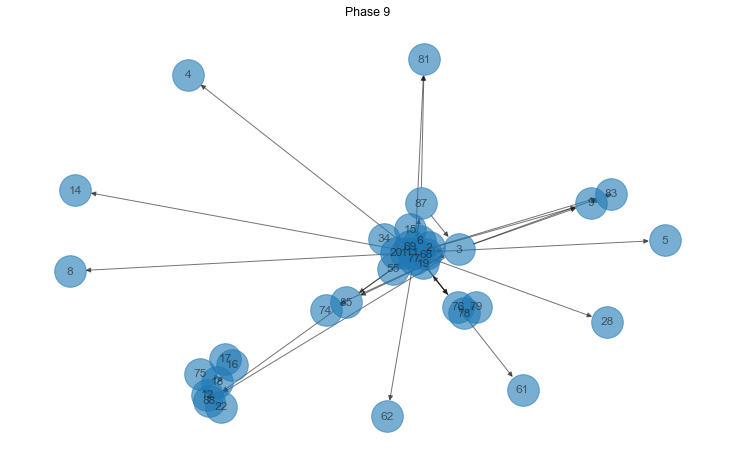

****************************************************************************************************
Graph for phase: 10


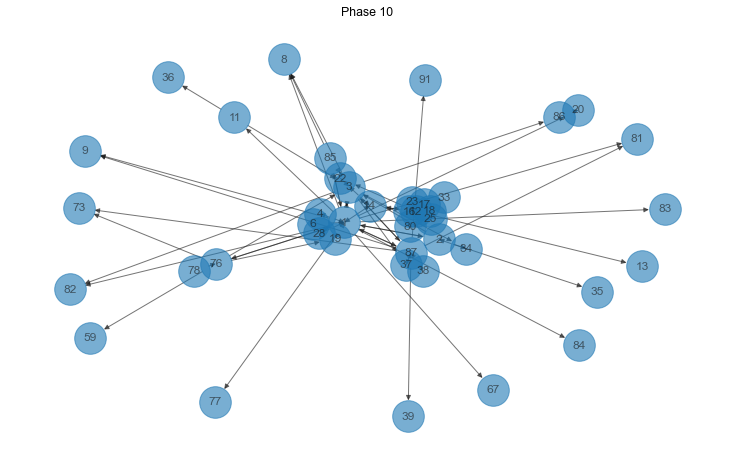

****************************************************************************************************
Graph for phase: 11


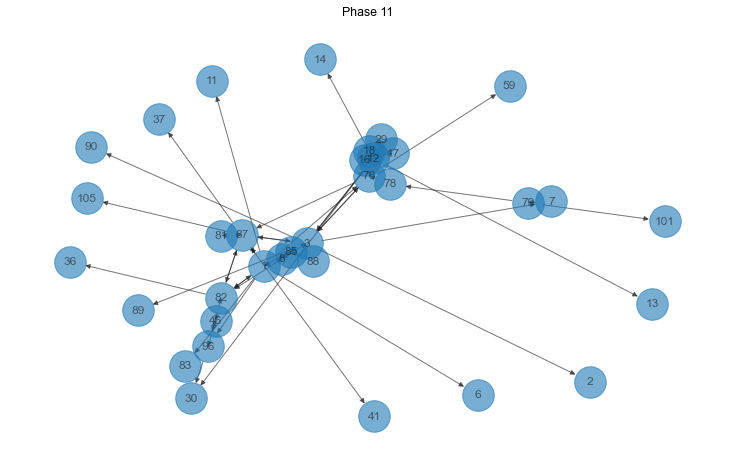

In [12]:
for i,g in enumerate(graphs):
    print("*"*100)
    print("Graph for phase:", i+1)
    nx.draw(g, with_labels=True, node_size=1000, alpha=0.6)
    plt.title(str(g))
    plt.show()

## 5. Centrality 
Let us now explore the various centrality measures for the above graphs as discussed in the LVC.

### 5a. Degree Centrality
- Let us now calculate the degree centrality

In [13]:
# let us store the degree centralities for each nodes for a graph in a dictionary
deg_cen = {}
for g in graphs:
    deg_cen[g] = nx.degree_centrality(g)

In [14]:
# let us look at the deg_cen dictionary
deg_cen

{<networkx.classes.digraph.DiGraph at 0x2ac85fa92e0>: {5: 0.07142857142857142,
  83: 0.14285714285714285,
  3: 0.2857142857142857,
  4: 0.07142857142857142,
  1: 1.1428571428571428,
  89: 0.2857142857142857,
  2: 0.07142857142857142,
  85: 0.3571428571428571,
  7: 0.14285714285714285,
  54: 0.07142857142857142,
  88: 0.5714285714285714,
  6: 0.2857142857142857,
  64: 0.07142857142857142,
  90: 0.07142857142857142,
  8: 0.07142857142857142},
 <networkx.classes.digraph.DiGraph at 0x2ac85fcc280>: {3: 0.04878048780487805,
  85: 0.0975609756097561,
  4: 0.024390243902439025,
  1: 0.5121951219512195,
  83: 0.07317073170731708,
  86: 0.024390243902439025,
  84: 0.04878048780487805,
  9: 0.024390243902439025,
  8: 0.07317073170731708,
  76: 0.0975609756097561,
  87: 0.34146341463414637,
  16: 0.04878048780487805,
  18: 0.024390243902439025,
  12: 0.21951219512195122,
  82: 0.1951219512195122,
  14: 0.14634146341463417,
  65: 0.024390243902439025,
  40: 0.024390243902439025,
  37: 0.31707317073

### 5b. Eigen, Betweenness, Closeness Centrality measures

In [15]:
# Similarily, we can generate other centrality measures
# let us try all the measures that we learnt in the LVC

# Eigen Vector Centrality

eig_cen = {}
for g in graphs:
    eig_cen[g] = nx.eigenvector_centrality(g)


# Betweenness Centrality

betw_cen = {}
for g in graphs:
    betw_cen[g] = nx.betweenness_centrality(g)

# Closeness Centrality

clo_cen = {}
for g in graphs:
    clo_cen[g] = nx.closeness_centrality(g)

### We have now created the dictionaries with the centrality measures

- The dictionaries are deg_cen, eig_cen, betw_cen, clo_cen
- We can sort the dictionaries to obtain the nodes that are the most important.

In [16]:
# let us now sort the degree centrality measure and identify the important nodes.

for ix, g in enumerate(graphs):
    temp_dict = {}
    for w in sorted(deg_cen[g], key=deg_cen[g].get, reverse=True):
        temp_dict[w] = deg_cen[g][w]
    print("Sorted Importance of nodes in terms of deg_cen for Phase {} is {}".format(ix+1, list(temp_dict.keys())[:5]))
    print()

Sorted Importance of nodes in terms of deg_cen for Phase 1 is [1, 88, 85, 3, 89]

Sorted Importance of nodes in terms of deg_cen for Phase 2 is [1, 87, 37, 12, 82]

Sorted Importance of nodes in terms of deg_cen for Phase 3 is [12, 1, 41, 76, 79]

Sorted Importance of nodes in terms of deg_cen for Phase 4 is [1, 89, 88, 8, 3]

Sorted Importance of nodes in terms of deg_cen for Phase 5 is [1, 3, 83, 86, 9]

Sorted Importance of nodes in terms of deg_cen for Phase 6 is [1, 83, 3, 85, 89]

Sorted Importance of nodes in terms of deg_cen for Phase 7 is [1, 12, 3, 31, 85]

Sorted Importance of nodes in terms of deg_cen for Phase 8 is [1, 3, 12, 76, 85]

Sorted Importance of nodes in terms of deg_cen for Phase 9 is [1, 3, 76, 19, 12]

Sorted Importance of nodes in terms of deg_cen for Phase 10 is [1, 3, 87, 12, 76]

Sorted Importance of nodes in terms of deg_cen for Phase 11 is [3, 1, 12, 87, 82]



#### We generated the degree centrality based top 5 most important nodes in each phase.
- We can go ahead and repeat the same exercise for the other centrality measures.

## 6. Understanding the variation of node importance across phases
- From the above analysis we figure out that some nodes appear to be more important than the others and we will focus our attention on analyzing those.

- Let us take out Node1, Node3 and Node12 and visualize their importance across phases. We will look at the betweenness and degree centrality only. Learners are encouraged to try out the same for other measures.

In [17]:
# Let us first start with node 1.

node1_deg = []
phases = []
for ix, g in enumerate(graphs):
    node1_deg.append(deg_cen[g][1]*100)
    phases.append(ix+1)

node1_bet = []

for ix, g in enumerate(graphs):
    node1_bet.append(betw_cen[g][1]*100)

# Now, let us calculate for node 3 and 12 too.

# Node3
node3_deg = []
for ix, g in enumerate(graphs):
    node3_deg.append(deg_cen[g][3]*100)

node3_bet = []
for ix, g in enumerate(graphs):
    node3_bet.append(betw_cen[g][3]*100)

# Node12
node12_deg = []
for ix, g in enumerate(graphs):
    if (12 in deg_cen[g].keys()):
        node12_deg.append(deg_cen[g][12]*100)
    else:
        node12_deg.append(None)

node12_bet = []
for ix, g in enumerate(graphs):
    if (12 in betw_cen[g].keys()):
        node12_bet.append(betw_cen[g][12]*100)
    else:
        node12_bet.append(None)


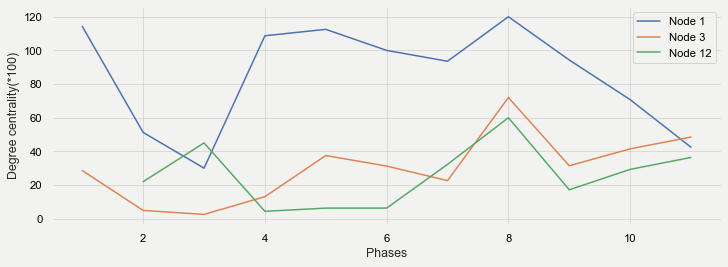

In [18]:
# Now, let us plot the same using plt.plot

# Plot Degree centrality for nodes 1, 3 and 12
plt.figure(figsize = (12,4))
plt.plot(phases, node1_deg,  label='Node 1')
plt.plot(phases, node3_deg, label='Node 3')
plt.plot(phases, node12_deg, label='Node 12')

plt.ylabel('Degree centrality(*100)')
plt.xlabel('Phases')
plt.legend()
plt.show()

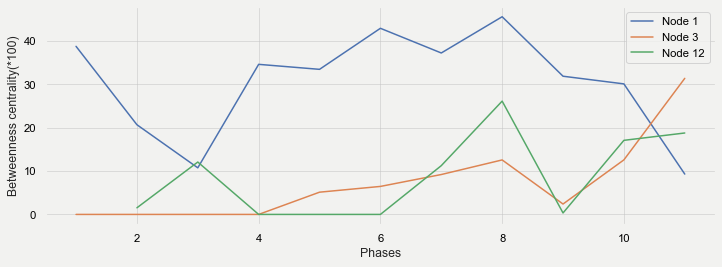

In [19]:
# plotting the Betweenness Centrality

# Plot Degree centrality for nodes 1, 3 and 12
plt.figure(figsize = (12,4))
plt.plot(phases, node1_bet,  label='Node 1')
plt.plot(phases, node3_bet, label='Node 3')
plt.plot(phases, node12_bet, label='Node 12')

plt.ylabel('Betweenness centrality(*100)')
plt.xlabel('Phases')
plt.legend()
plt.show()

## Comments:
- We carried out the analysis on the network and figured out techniques to read adjacency matrices into graphs.
- We later visualized the graphs, created centrality measures and identified important nodes - N1, N3, N12
- We studied and plotted the variation in the centrality of the important nodes across phases in a bid to understand the affect of disruption of the network.

### Bonus: We can highlight the important nodes in our plots

- Let have a look at the phase 1 graph: graph1


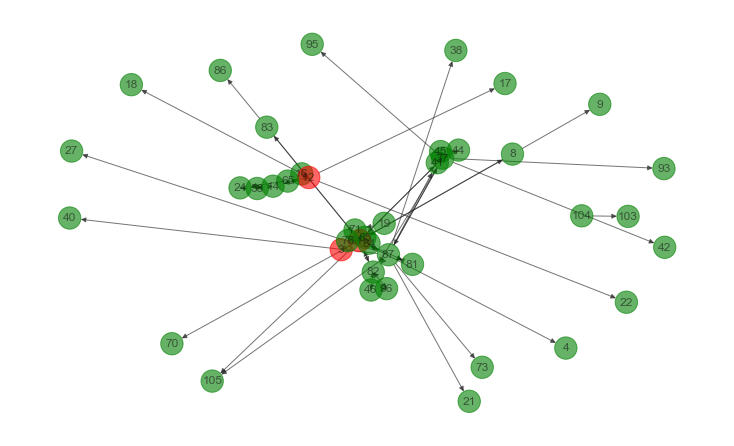

In [20]:
graph2 = nx.from_pandas_adjacency(P2, create_using = nx.DiGraph())
color = []
for node in graph2:
    if (node == 1 or node == 12  or node == 3):
        color.append('red')
    else:
        color.append('green')
        
nx.draw_spring(graph2, node_color=color, with_labels=True, node_size=500, alpha=0.6)

### Comments:
- The important nodes have been marked in red